# Random Forest and Shapley Values

https://www.kaggle.com/code/vikumsw/explaining-random-forest-model-with-shapely-values

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import shap
import os
os.chdir('/Users/tomravalde/Library/CloudStorage/GoogleDrive-tomravalde@gmail.com/My Drive/tomelia/admin/work/python_projects/ml_upskilling')
from supervised_learning.retrieve_and_create_data import collection


In [50]:
df = collection.get_dataframe('imputed_iterative')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0.0


In [51]:
# Define features and target
X = df.drop(['quality', 'target'], axis=1)  # Features
y = df['target']               # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model (optional)
accuracy = rf_model.score(X_test, y_test)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.896875


In [70]:
# Initialize the explainer
explainer = shap.TreeExplainer(rf_model)

In [71]:
X_test.loc[803]

fixed acidity            7.7000
volatile acidity         0.5600
citric acid              0.0800
residual sugar           2.5000
chlorides                0.1140
free sulfur dioxide     14.0000
total sulfur dioxide    46.0000
density                  0.9971
pH                       3.2400
sulphates                0.6600
alcohol                  9.6000
Name: 803, dtype: float64

In [93]:
# Calculate Shap values
chosen_instance = X_test.loc[[803]]
shap_values = explainer.shap_values(chosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[:, :, 1], chosen_instance)


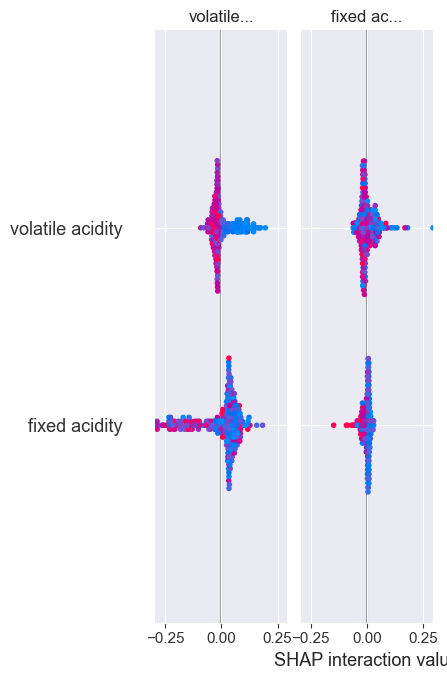

In [94]:

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)


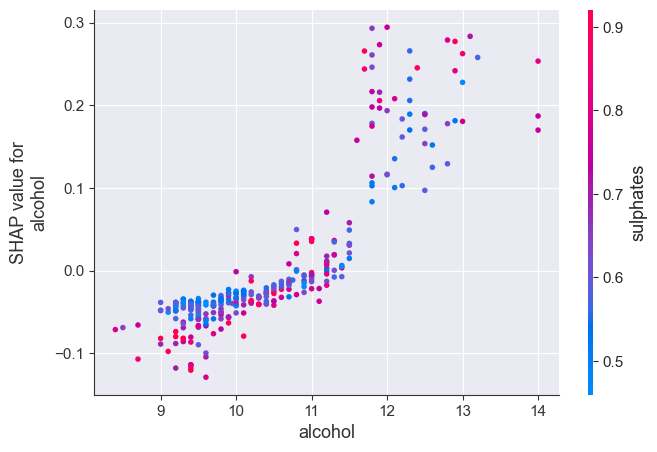

In [95]:
# Plot SHAP dependence plot for a specific feature (e.g., 'alcohol')
shap.dependence_plot('alcohol', shap_values[:, :, 1], X_test)


In [100]:
shap.summary_plot(shap_values[:, 1], X_train)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.